In [1]:
import tensorflow as tf
import Util
import random
import time

In [109]:
def addDense(name, config = tf.keras.layers.Dense(units=1, input_shape=[1]).get_config(), seed = 1):
    # Adjustable parameters: unit(0-100)
    config["name"] = f'la{name}yer'
    config["units"] = int(1000/5*(seed % 5))
    return tf.keras.layers.Dense.from_config(config)

def addConv2D(name, config = tf.keras.layers.Conv2D(filters=1, kernel_size=1).get_config(), seed = 1):  #(550 paras)  
    # Adjustable parameters: filters(0-20), kernel_size([(1-20), (1-20)]), strides([(1-5), (1-5)]), padding('valid', 'same'),
    # activation(‘softmax', 'elu', 'selu', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'exponential', 'linear', None)
    # kernel_initializer('Zeros', 'Ones', 'Constant', 'RandomNormal', 'RandomUniform', 'TruncatedNormal', 'VarianceScaling',
    # 'Orthogonal', 'lecun_uniform', 'glorot_normal', 'glorot_uniform', 'he_normal', 'lecun_normal', 'Identity) 
    config["name"] = f'la{name}yer'
    config["filters"] = int(20/5*(seed % 5))+1
#     config["kernel_size"]= [int(20/5*(seed % 5)) for _ in range(2)]
    config["strides"] = [int(5/5*(seed % 5))+1 for _ in range(2)]
    config["padding"] = ['valid', 'same'][seed % 2]
    config["activation"] = ['softmax', 'elu', 'selu', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid',
                            'exponential', 'linear'][seed % 11]
#     config["kernel_initializer"] = ['Zeros', 'Ones', 'Constant', 'RandomNormal', 'RandomUniform', 'TruncatedNormal', 
#                                     'VarianceScaling','Orthogonal', 'lecun_uniform', 'glorot_normal', 'glorot_uniform', 
#                                     'he_normal', 'lecun_normal', 'Identity'][seed % 14]
    
    return tf.keras.layers.Conv2D.from_config(config)
    
def addBatchNorm(name, config = tf.keras.layers.BatchNormalization().get_config(), seed = 1):
    # Adjustable parameter: momentum(0.0-1.0), epsilon(0.0-1.0)
    config["name"] = f'la{name}yer'
    config["momentum"] = 1/5*(seed % 5)
    config["epsilon"] = 1/5*(seed % 5)
    
    return tf.keras.layers.BatchNormalization.from_config(config)
    
    
def addMaxPool(name, config = tf.keras.layers.MaxPooling2D(pool_size=(1,1)).get_config(), seed = 1):
    # Adjustable parameter: pool_size[(1-5), (1-5)], strides([(1-5), (1-5)]), padding('valid', 'same')
    config["name"] = f'la{name}yer'
#     config["pool_size"] = [int(5/5*(seed % 5)) for _ in range(2)]
    config["strides"] = [int(5/5*(seed % 5))+1 for _ in range(2)]
    config["padding"] = ['valid', 'same'][seed % 2]
    
    return tf.keras.layers.MaxPooling2D.from_config(config)
    

def addDropout(name, config = tf.keras.layers.Dropout(rate=0.1).get_config(), seed = 1):
    # Adjustable parameter: rate(0.0-1.0), seed(1, 2, 3, 4, 5)
    config["name"] = f'la{name}yer'
    config["rate"] = 1/5*(seed % 5)
    config["seed"] = seed % 5
    return tf.keras.layers.Dropout.from_config(config)

def addActivation(name, config = tf.keras.layers.Activation(activation="softmax").get_config(), seed = 1):
    # Adjustable parameter: activation(‘softmax', 'elu', 'selu', 'softplus', 'softsign', 'relu', 'tanh', 
    # 'sigmoid', 'hard_sigmoid', 'exponential', 'linear')
    config["name"] = f'la{name}yer'
    config["activation"] = ['softmax', 'elu', 'selu', 'softplus', 'softsign', 'relu', 'tanh', 
     'sigmoid', 'hard_sigmoid', 'exponential', 'linear'][seed % 11]
    
    return tf.keras.layers.Activation.from_config(config)

def addZeroPadd(name, config = tf.keras.layers.ZeroPadding2D().get_config(), seed = 1):
    # Adjustable parameter: activation(‘softmax', 'elu', 'selu', 'softplus', 'softsign', 'relu', 'tanh', 
    # 'sigmoid', 'hard_sigmoid', 'exponential', 'linear')
    config["name"] = f'la{name}yer'
    config["padding"] =[int(9/5*(seed % 5))+1 for _ in range(2)]
    config["data_format"] = ['channels_first','channels_last'][seed % 2]
    
    return tf.keras.layers.ZeroPadding2D.from_config(config)

def extractModelArchitect(model):
    model_architect = []
    for layer_config in model.get_config()['layers']:
        model_architect.append(layer_config['class_name'])
    return model_architect

def modelReduction(architect):
    reduced_architect = []
    for layer in architect:
        if layer not in reduced_architect:
            reduced_architect.append(layer)
    return reduced_architect

def buildModelByArtchitect(architect, input_shape, seed):
    model = tf.keras.Sequential()
    layer_count = 0
    for layer_name in architect:
        if (layer_name == 'InputLayer'):
            model.add(tf.keras.layers.InputLayer(input_shape=input_shape))
        elif (layer_name == 'Dense'): #Dense Layer
            model.add(addDense(layer_count, seed=seed))
        elif (layer_name == 'Conv2D'): #Conv2D
            model.add(addConv2D(layer_count, seed=seed))
        elif (layer_name == 'BatchNormalization'): #BatchNorm
            model.add(addBatchNorm(layer_count, seed=seed))
        elif (layer_name == 'Dropout'): #Droput
            model.add(addDropout(layer_count, seed=seed))
        elif (layer_name == 'MaxPooling2D'): #MaxPool
            model.add(addMaxPool(layer_count, seed=seed))
        elif (layer_name == 'Activation'): #Activation
            model.add(addActivation(layer_count, seed=seed))
        elif (layer_name == 'ZeroPadding2D'): #ZeroPadd
            model.add(addZeroPadd(layer_count, seed=seed))
        elif (layer_name == 'Flatten'): #Flatten
            model.add(tf.keras.layers.Flatten())
        else:
            print(f'unidentify layer: {layer_name}')
        layer_count += 1
    return model
    

In [3]:
# load model
origin_model = tf.keras.models.load_model("./alexnet-cifar10_origin.h5")
# origin_model = tf.keras.applications.resnet50.ResNet50(include_top=False, input_shape=(32,32,3))

#get model architecture
model_architect = extractModelArchitect(origin_model)
reduced_architect = modelReduction(model_architect)

# load datasets
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data() 
input_shape = x_test.shape[1:]

TOTAL_MODELS = 50
model_list = []
reduced_model_list = []
random_seeds = [int(random.random()*10000) for _ in range(TOTAL_MODELS)]

In [4]:
st = time.time()
#generate mutated models
for _ in range(TOTAL_MODELS):
    model_list.append(buildModelByArtchitect(model_architect, input_shape, random_seeds[_]))
    
print(f'it takes {time.time()-st}s to generate mutated alexnet models')

st = time.time()
#generate mutated models
for _ in range(TOTAL_MODELS):
    reduced_model_list.append(buildModelByArtchitect(reduced_architect, input_shape, random_seeds[_]))
    
print(f'it takes {time.time()-st}s to generate reduced mutated alexnet models')

it takes 5.898905992507935s to generate mutated alexnet models
it takes 1.8774549961090088s to generate reduced mutated alexnet models


In [5]:
st = time.time()
#get the coverage
a_cov_table_list = []
for _ in model_list:
    a_cov_table_list.append(Util.calc_coverage(_, x_test))
    
print(f'it takes {time.time()-st}s to get mutated alexnet coverage')
    
st = time.time()
a_reduced_cov_table_list = []
for _ in reduced_model_list:
    a_reduced_cov_table_list.append(Util.calc_coverage(_, x_test))
    
print(f'it takes {time.time()-st}s to get reduced alexnet coverage')

it takes 209.62278819084167s to get mutated alexnet coverage
it takes 179.37725591659546s to get reduced alexnet coverage


In [6]:
a_result = []
for _ in a_cov_table_list:
    a_result.append(Util.total_lines(_))

r_a_result = []
for _ in a_reduced_cov_table_list:
    r_a_result.append(Util.total_lines(_))

4863

In [8]:
origin_model = tf.keras.applications.resnet50.ResNet50(include_top=False, input_shape=(32,32,3))
model_architect = extractModelArchitect(origin_model)
reduced_architect = modelReduction(model_architect)
TOTAL_MODELS = 50
model_list = []
reduced_model_list = []
random_seeds = [int(random.random()*10000) for _ in range(TOTAL_MODELS)]
st = time.time()
#generate mutated models
for _ in range(TOTAL_MODELS):
    model_list.append(buildModelByArtchitect(model_architect, input_shape, random_seeds[_]))
print(f'it takes {time.time()-st}s to generate mutated resnet models')

st = time.time()
for _ in range(TOTAL_MODELS):
    reduced_model_list.append(buildModelByArtchitect(reduced_architect, input_shape, random_seeds[_]))
print(f'it takes {time.time()-st}s to generate reduced mutated resnet models')


st = time.time()
#get the coverage
cov_table_list = []

r_cov_table_list = []

for _ in model_list:
    cov_table_list.append(Util.calc_coverage(_, x_test))
    
print(f'it takes {time.time()-st}s to get resnet coverage')
    
for _ in reduced_model_list:
    r_cov_table_list.append(Util.calc_coverage(_, x_test))
    
print(f'it takes {time.time()-st}s to get resnet coverage')
    
r_result = []
r_r_result = []
for _ in cov_table_list:
    r_result.append(Util.total_lines(_))
    
for _ in r_cov_table_list:
    r_r_result.append(Util.total_lines(_))

unidentify layer: ZeroPadding2D
unidentify layer: ZeroPadding2D
unidentify layer: Add
unidentify layer: Add
unidentify layer: Add
unidentify layer: Add
unidentify layer: Add
unidentify layer: Add
unidentify layer: Add
unidentify layer: Add
unidentify layer: Add
unidentify layer: Add
unidentify layer: Add
unidentify layer: Add
unidentify layer: Add
unidentify layer: Add
unidentify layer: Add
unidentify layer: Add
unidentify layer: ZeroPadding2D
unidentify layer: ZeroPadding2D
unidentify layer: Add
unidentify layer: Add
unidentify layer: Add
unidentify layer: Add
unidentify layer: Add
unidentify layer: Add
unidentify layer: Add
unidentify layer: Add
unidentify layer: Add
unidentify layer: Add
unidentify layer: Add
unidentify layer: Add
unidentify layer: Add
unidentify layer: Add
unidentify layer: Add
unidentify layer: Add
unidentify layer: ZeroPadding2D
unidentify layer: ZeroPadding2D
unidentify layer: Add
unidentify layer: Add
unidentify layer: Add
unidentify layer: Add
unidentify layer

unidentify layer: Add
unidentify layer: Add
unidentify layer: Add
unidentify layer: Add
unidentify layer: ZeroPadding2D
unidentify layer: ZeroPadding2D
unidentify layer: Add
unidentify layer: Add
unidentify layer: Add
unidentify layer: Add
unidentify layer: Add
unidentify layer: Add
unidentify layer: Add
unidentify layer: Add
unidentify layer: Add
unidentify layer: Add
unidentify layer: Add
unidentify layer: Add
unidentify layer: Add
unidentify layer: Add
unidentify layer: Add
unidentify layer: Add
unidentify layer: ZeroPadding2D
unidentify layer: ZeroPadding2D
unidentify layer: Add
unidentify layer: Add
unidentify layer: Add
unidentify layer: Add
unidentify layer: Add
unidentify layer: Add
unidentify layer: Add
unidentify layer: Add
unidentify layer: Add
unidentify layer: Add
unidentify layer: Add
unidentify layer: Add
unidentify layer: Add
unidentify layer: Add
unidentify layer: Add
unidentify layer: Add
unidentify layer: ZeroPadding2D
unidentify layer: ZeroPadding2D
unidentify layer

unidentify layer: Add
unidentify layer: Add
unidentify layer: Add
unidentify layer: Add
unidentify layer: Add
unidentify layer: Add
unidentify layer: Add
unidentify layer: Add
unidentify layer: ZeroPadding2D
unidentify layer: ZeroPadding2D
unidentify layer: Add
unidentify layer: Add
unidentify layer: Add
unidentify layer: Add
unidentify layer: Add
unidentify layer: Add
unidentify layer: Add
unidentify layer: Add
unidentify layer: Add
unidentify layer: Add
unidentify layer: Add
unidentify layer: Add
unidentify layer: Add
unidentify layer: Add
unidentify layer: Add
unidentify layer: Add
unidentify layer: ZeroPadding2D
unidentify layer: ZeroPadding2D
unidentify layer: Add
unidentify layer: Add
unidentify layer: Add
unidentify layer: Add
unidentify layer: Add
unidentify layer: Add
unidentify layer: Add
unidentify layer: Add
unidentify layer: Add
unidentify layer: Add
unidentify layer: Add
unidentify layer: Add
unidentify layer: Add
unidentify layer: Add
unidentify layer: Add
unidentify lay

In [88]:
reduced_architect

['InputLayer',
 'ZeroPadding2D',
 'Conv2D',
 'BatchNormalization',
 'Activation',
 'MaxPooling2D',
 'Add']

In [69]:
a = cov_table_list[r_result.index(4748)]

In [70]:
b = reduced_model_list[r_r_result.index(4758)]

In [83]:
for i in range(len(b)):
    if (a[i] != b[i]):
        print(a[i])
        print(b[i])
        print('\n')

('D:\\anaconda3\\Lib\\site-packages\\tensorflow\\python\\eager\\function.py', [120, 121, 157, 257, 258, 259, 262, 263, 273, 282, 285, 288, 289, 384, 410, 458, 461, 462, 464, 465, 475, 476, 477, 478, 479, 480, 481, 482, 483, 484, 485, 486, 487, 489, 490, 493, 494, 498, 499, 500, 501, 502, 503, 504, 505, 506, 507, 508, 509, 510, 511, 512, 513, 514, 515, 517, 518, 519, 520, 521, 522, 523, 547, 573, 583, 586, 587, 590, 591, 593, 594, 595, 596, 597, 598, 599, 600, 601, 602, 603, 613, 634, 635, 636, 637, 681, 682, 683, 684, 685, 686, 687, 690, 691, 839, 840, 845, 1546, 1547, 1549, 1550, 1553, 1555, 1580, 1581, 1582, 1584, 1587, 1593, 1594, 1595, 1596, 1599, 1603, 1604, 1610, 1611, 1612, 1625, 1627, 1628, 1629, 1630, 1631, 1632, 1633, 1634, 1635, 1636, 1637, 1638, 1639, 1640, 1641, 1642, 1643, 1644, 1645, 1907, 1908, 1911, 1912, 1915, 1916, 1920, 1921, 1922, 1923, 1931, 1932, 1933, 1954, 1955, 1956, 1957, 1959, 1960, 1997, 2002, 2031, 2036, 2163, 2164, 2165, 2311, 2315, 2316, 2317, 2318, 2319

In [33]:
import matplotlib.pyplot as plt
import pandas as pd

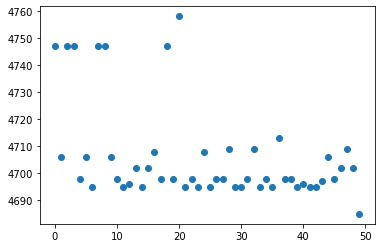

In [32]:
plt.scatter(range(50), r_r_result)

In [44]:
r_result_df = pd.DataFrame(r_result)
r_r_result_df = pd.DataFrame(r_r_result)

In [58]:
print(r_result_df[0].sort_values().unique())
print(r_r_result_df[0].sort_values().unique())

[4685 4695 4697 4698 4702 4709 4747 4748]
[4685 4695 4696 4697 4698 4702 4706 4708 4709 4713 4747 4758]


In [96]:
reduced_architect

['InputLayer',
 'ZeroPadding2D',
 'Conv2D',
 'BatchNormalization',
 'Activation',
 'MaxPooling2D',
 'Add']

In [103]:
a = tf.keras.models.load_model("./alexnet-cifar10_origin.h5")

In [111]:
b = tf.keras.applications.resnet50.ResNet50(include_top=False, input_shape=(32,32,3))

In [118]:
c = modelReduction(extractModelArchitect(a) + extractModelArchitect(b))

In [123]:
c = ['InputLayer',
 'Conv2D',
 'MaxPooling2D',
 'BatchNormalization',
 'ZeroPadding2D',
 'Flatten',
 'Dense',
 'Dropout',
 'Activation',
 'Add']

In [135]:
d = buildModelByArtchitect(c, (32,32,3), 901131)

unidentify layer: Add


In [136]:
e=Util.calc_coverage(d, x_test)

In [141]:
def addMaxPool(name, config = tf.keras.layers.MaxPooling2D(pool_size=(1,1)).get_config(), seed = 1):
    # Adjustable parameter: pool_size[(1-5), (1-5)], strides([(1-5), (1-5)]), padding('valid', 'same')
    config["name"] = f'la{name}yer'
#     config["pool_size"] = [int(5/5*(seed % 5)) for _ in range(2)]
    config["strides"] = [int(5/5*(seed % 5))+1 for _ in range(2)]
    config["padding"] = ['valid', 'same'][seed % 2]
    
    return tf.keras.layers.MaxPooling2D.from_config(config)

In [148]:
addMaxPool('name', seed = )

2

In [152]:
dir(tf.keras.layers)

['AbstractRNNCell',
 'Activation',
 'ActivityRegularization',
 'Add',
 'AdditiveAttention',
 'AlphaDropout',
 'Attention',
 'Average',
 'AveragePooling1D',
 'AveragePooling2D',
 'AveragePooling3D',
 'AvgPool1D',
 'AvgPool2D',
 'AvgPool3D',
 'BatchNormalization',
 'Bidirectional',
 'CategoryEncoding',
 'CenterCrop',
 'Concatenate',
 'Conv1D',
 'Conv1DTranspose',
 'Conv2D',
 'Conv2DTranspose',
 'Conv3D',
 'Conv3DTranspose',
 'ConvLSTM1D',
 'ConvLSTM2D',
 'ConvLSTM3D',
 'Convolution1D',
 'Convolution1DTranspose',
 'Convolution2D',
 'Convolution2DTranspose',
 'Convolution3D',
 'Convolution3DTranspose',
 'Cropping1D',
 'Cropping2D',
 'Cropping3D',
 'Dense',
 'DenseFeatures',
 'DepthwiseConv1D',
 'DepthwiseConv2D',
 'Discretization',
 'Dot',
 'Dropout',
 'ELU',
 'Embedding',
 'Flatten',
 'GRU',
 'GRUCell',
 'GaussianDropout',
 'GaussianNoise',
 'GlobalAveragePooling1D',
 'GlobalAveragePooling2D',
 'GlobalAveragePooling3D',
 'GlobalAvgPool1D',
 'GlobalAvgPool2D',
 'GlobalAvgPool3D',
 'GlobalM

In [146]:
tf.keras.layers.MaxPooling2D(pool_size=(1,1)).get_config()

{'name': 'max_pooling2d_2',
 'trainable': True,
 'dtype': 'float32',
 'pool_size': (1, 1),
 'padding': 'valid',
 'strides': (1, 1),
 'data_format': 'channels_last'}